<a href="https://colab.research.google.com/github/smlra-kjsce/Pytorch-101-2023/blob/main/Autograd_and_optimizers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Forward & Backward Passes 

The forward pass of any neural network or for that matter a linear layer is just computing the predicted values of y from the given x value and the current weights.

After the forward pass, loss is calculated. The backward pass deals with computing the gradients, i.e. the derivatives of the loss wrt the weights from the loss so that the weights can be updated for further iterations. 

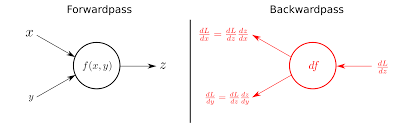

# Gradient Descent 

In [1]:
from IPython.display import Image
Image(url="https://thumbs.gfycat.com/AngryInconsequentialDiplodocus-size_restricted.gif")

We usually update the weights using gradient descent algorithm. It tries to find the minima of the loss function so that the model is optimized. The formula to update the weights using gradient descent is

w = w - (lr) * (w.gradients)

Gradient descent is one of the many optimizers that can be used. 

# Autograd

Autograd is used to calulate the gradients of a tensor. It is a very useful tool when we know that we would require to calulcate the gradients of a tensor. It stores a computational graph of the tensor. It simply works by setting requires_grad=True


In [2]:
import torch

In [3]:
x=torch.randn(3,2,requires_grad=True)
print(x)

# In the output, we can see the AddBackward, i.e. the output has been obtained by adding
y = x + 10
print(y)

# In the output, we can see the MulBackward, i.e. the output has been obtained by mutiplication
z = y*y*y
print(z)

# In the output, we can see the MeanBackward, i.e. the output has been obtained by taking average
w = z.mean()
print(w)

tensor([[-1.2951,  1.6794],
        [-0.4951,  1.5315],
        [-0.5523, -0.4757]], requires_grad=True)
tensor([[ 8.7049, 11.6794],
        [ 9.5049, 11.5315],
        [ 9.4477,  9.5243]], grad_fn=<AddBackward0>)
tensor([[ 659.6056, 1593.1687],
        [ 858.7086, 1533.4122],
        [ 843.2810,  863.9839]], grad_fn=<MulBackward0>)
tensor(1058.6934, grad_fn=<MeanBackward0>)


To see the gradients of the tensor, we just need to call .backward() method. The gradients are calculated with respect to the original tensor and are stored in original_tensor.grads

In [4]:
x=torch.randn(2,4,requires_grad=True)
print(x)

y=x+2
print(y)

z=y.mean()
print(z)

z.backward()
print(x.grad)

tensor([[-0.6995, -0.8190, -0.0873, -1.0672],
        [-0.0316, -0.7473, -0.3984,  1.0585]], requires_grad=True)
tensor([[1.3005, 1.1810, 1.9127, 0.9328],
        [1.9684, 1.2527, 1.6016, 3.0585]], grad_fn=<AddBackward0>)
tensor(1.6510, grad_fn=<MeanBackward0>)
tensor([[0.1250, 0.1250, 0.1250, 0.1250],
        [0.1250, 0.1250, 0.1250, 0.1250]])


Note that the last value was a single valued tensor i.e. a sclar(as we computed mean). So there was no need of specifying the vector with respect to whose gradient we needed to calculate. However if the last value would have been a vector, we need to pass a vector of the same dimension as that of the last value to the .grad() function in order for pytorch to know in respect to which values of the vector, it needs to calculate the gradients.

In [5]:
x=torch.randn(2,4,requires_grad=True)
print(x)

y=x+2
print(y)

z=y*y
print(z)

w = torch.randn(2,4)
z.backward(w)
print(x.grad)

tensor([[ 0.2736, -1.7021,  1.0001, -0.5356],
        [ 0.3485,  2.0273,  0.1088, -1.2772]], requires_grad=True)
tensor([[2.2736, 0.2979, 3.0001, 1.4644],
        [2.3485, 4.0273, 2.1088, 0.7228]], grad_fn=<AddBackward0>)
tensor([[ 5.1691,  0.0888,  9.0008,  2.1444],
        [ 5.5153, 16.2189,  4.4470,  0.5224]], grad_fn=<MulBackward0>)
tensor([[ 6.8855,  0.7729,  6.8181, -1.7680],
        [ 1.6124,  1.8710,  2.1220, -0.3147]])


Sometimes, we do not require pytorch to track the graidents, so for such times, we can either directly set the requires_grad to false or use x.detach() or wrap the functions in 'with torch.no_grad():'

In [6]:
x=torch.randn(2,4,requires_grad=True)
print(x)

# As we can see, we do not have the grad_fn in the y and z tensors
y = x.detach()
print(y)

with torch.no_grad():
  z = x+1
  print(z)

tensor([[ 0.0586, -1.7957, -1.6620, -0.1025],
        [ 0.4816, -0.1239, -0.2575, -0.2463]], requires_grad=True)
tensor([[ 0.0586, -1.7957, -1.6620, -0.1025],
        [ 0.4816, -0.1239, -0.2575, -0.2463]])
tensor([[ 1.0586, -0.7957, -0.6620,  0.8975],
        [ 1.4816,  0.8761,  0.7425,  0.7537]])


Many a times during training, we need to flush out the gradients, so that they are not accumulated again and again during other epochs. This is achieved simply by using the tensor.grad.zero_() method

In [7]:
x=torch.randn(2,4,requires_grad=True)
print(x)

for i in range(3):
  y = (x+2).mean()
  y.backward()
  print(x.grad)

print("The above adds the gradients again and again and hence is incorrect. The correct one is shown below ")

for i in range(3):
  y = (x+2).mean()
  y.backward()
  print(x.grad)
  x.grad.zero_()     # This flushes out the gradients

tensor([[ 1.1620,  0.8418, -0.8677,  0.2599],
        [-0.9022,  0.8239, -0.5743,  0.1103]], requires_grad=True)
tensor([[0.1250, 0.1250, 0.1250, 0.1250],
        [0.1250, 0.1250, 0.1250, 0.1250]])
tensor([[0.2500, 0.2500, 0.2500, 0.2500],
        [0.2500, 0.2500, 0.2500, 0.2500]])
tensor([[0.3750, 0.3750, 0.3750, 0.3750],
        [0.3750, 0.3750, 0.3750, 0.3750]])
The above adds the gradients again and again and hence is incorrect. The correct one is shown below 
tensor([[0.5000, 0.5000, 0.5000, 0.5000],
        [0.5000, 0.5000, 0.5000, 0.5000]])
tensor([[0.1250, 0.1250, 0.1250, 0.1250],
        [0.1250, 0.1250, 0.1250, 0.1250]])
tensor([[0.1250, 0.1250, 0.1250, 0.1250],
        [0.1250, 0.1250, 0.1250, 0.1250]])


Having learnt this, now let us implement a small linear regression in pytorch with the recently learnt autograds.

Here's an overview of the linear regression algorithm
1. We assume the hypothesis function as y_pred = w * x + c

2. Loss is calculated using y_predicted and y_true. 

3. The derivative of loss wrt the weights is computed. 

4. Weights are updated using gradient descent and we again go to step one.

In [8]:
# We import nn for the loss function.
import torch.nn as nn

# Our data points, here we have only two :( 
x = torch.tensor([10.0,5.0])
y = torch.tensor([10.0,5.0])

# Initialize w and b as 1 and 0 respectively
w = torch.ones(1,requires_grad=True)
b = torch.ones(1,requires_grad=True)

# Define the forward pass
def forward(x):
  return w*x+b

# Define hyperparameters i.e. learning rate and epochs
epochs = 100
learning_rate = 0.001

# Build the linear regression loop and train it for sepcified epochs. We use simple Mean squared loss (MSE)
for i in range (epochs+1):

  # Forward Pass
  y_predicted = forward(x)

  # caluclating Loss
  loss = nn.MSELoss()
  L = loss(y,y_predicted)

  # Calculating gradients for the loss (Backward pass or backpropagation)
  L.backward()

  # Manually Updating weights starts here
  # Since we do not need pytorch to track this updates, as this is not used in backprop, we use it inside no_grad()
  # with torch.no_grad():
    # w -= learning_rate*(w.grad)
    # b -= learning_rate*(b.grad)

  # WARNING: Do not forget to flush out weights
  # w.grad.zero_()
  # b.grad.zero_()
  # Manually updating weights end here

  # Instead of manually updating the weights, we can use optimizer present in pytorch.nn module
  # Here, we have used SGD(Stochastic Gradient Descent)
  optimizer = torch.optim.SGD([w,b],lr=learning_rate)
  optimizer.step()
  optimizer.zero_grad()

  if (i%10 == 0 ):
    print("Epoch " + str(i))
    print("Loss " + str(L))

print(y_predicted)

Epoch 0
Loss tensor(1., grad_fn=<MseLossBackward0>)
Epoch 10
Loss tensor(0.1568, grad_fn=<MseLossBackward0>)
Epoch 20
Loss tensor(0.1004, grad_fn=<MseLossBackward0>)
Epoch 30
Loss tensor(0.0963, grad_fn=<MseLossBackward0>)
Epoch 40
Loss tensor(0.0957, grad_fn=<MseLossBackward0>)
Epoch 50
Loss tensor(0.0953, grad_fn=<MseLossBackward0>)
Epoch 60
Loss tensor(0.0949, grad_fn=<MseLossBackward0>)
Epoch 70
Loss tensor(0.0945, grad_fn=<MseLossBackward0>)
Epoch 80
Loss tensor(0.0942, grad_fn=<MseLossBackward0>)
Epoch 90
Loss tensor(0.0938, grad_fn=<MseLossBackward0>)
Epoch 100
Loss tensor(0.0934, grad_fn=<MseLossBackward0>)
tensor([9.8049, 5.3857], grad_fn=<AddBackward0>)


A very important point to note in the above code is that while updating the w and b if we write w = w - lr * (w.grad), it won't work. This is becasue this statement will store it in a new 'w'. Hence we use w -= lr * (w.grad)